In [1]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maurice1979/joc-dels-cavalls/blob/master/matematiques-joc_cavalls.ipynb)

SyntaxError: invalid syntax (<ipython-input-1-27cf63f869bf>, line 1)

Importem llibreries necessàries:

In [202]:
import random
import pandas as pd
from tqdm import tqdm

import matplotlib
%matplotlib inline

# Funcions

## Tira dau

In [259]:
def tira_dau():
    """Retorna un número a l'atzar entre 1 i 6."""

    return random.randint(1,6)

Exemple d'ús:

In [30]:
tira_dau()

2

## Suma 2 daus

In [260]:
def suma_2_daus():
    """Retorna la suma de cridar la funció `tira_dau` dos cops."""

    return tira_dau()+tira_dau()

Exemple d'ús:

In [40]:
suma_2_daus()

9

## Simula joc

In [264]:
def simula_joc():
    """Simula un partida, tirant 2 daus fins que un cavall assoleix 10 punts.
    
    Retorna
    -------
    guanyador: número del cavall guanyandor
    marcador: resultat del marcador final

    """
    # Inicialitzem marcador a zero
    marcador = pd.DataFrame(columns=['marcador'],  index=[2,3,4,5,6,7,8,9,10,11,12])
    marcador['marcador'] = 0
    
    # Anem tirant dos daus fins que un cavall assoleix 10 punts
    while marcador['marcador'].max()<10:
        tirada_daus = suma_2_daus()
        valor_actual = marcador.loc[marcador.index == tirada_daus, 'marcador'].values[0]
        nou_valor = valor_actual + 1
        marcador.loc[marcador.index == tirada_daus, 'marcador'] = nou_valor
    
    # Extreiem el cavall guanyador buscant quin és el cavall que té 10 punts
    guanyador = marcador.loc[marcador['marcador']==10].index[0]

    return guanyador, marcador

Exemple d'ús:

In [265]:
guanyador, marcador = simula_joc()
print(f'Aquesta partida la guanya el cavall "{guanyador}"')
marcador

Aquesta partida la guanya el cavall "7"


,marcador
2,0
3,3
4,3
5,8
6,8
7,10
8,5
9,4
10,6
11,2


## Simula partides

In [206]:
def simula_partides(n_partides=20):
    """Simula el resultat de jugar `n_partides`.
    
    Parametres
    ----------
    n_partides: nombre de partides que volem simular, opcional
        Per defecte simula 20 partides.
        
    Retorna
    -------
    partides : llista de `n_partides` amb el cavall guanyador a cada partida
    
    """

    partides = pd.DataFrame(columns=['guanyador'])
    
    # Iterem `n_partides` vegades
    for i in tqdm(range(0, n_partides)):
        guanyador, resultat_partida = simula_joc()
        partides = partides.append(pd.DataFrame([guanyador], columns=['guanyador']), ignore_index=True)
    
    partides['guanyador'] = pd.to_numeric(partides['guanyador'])

    return partides

Exemple d'ús:

In [267]:
resultats_partides = simula_partides() # simula 20 partides
resultats_partides

100%|██████████| 20/20 [00:00<00:00, 20.89it/s]


,guanyador
0,7
1,6
2,6
3,6
4,10
5,6
6,7
7,9
8,8
9,7


# Simulació de molts jocs

En aquesta secció podem simular el nombre de jocs que volguem. No s'aconsella superar el milió de partides perquè les simulacions podrien trigar moltes hores.

In [271]:
nombre_de_partides_a_jugar = 100 

In [272]:
resultats_partides = simula_partides(n_partides=nombre_de_partides_a_jugar)

100%|██████████| 100/100 [00:04<00:00, 20.52it/s]


Podem visualitzar el resultat, però no dona gaire informació

In [273]:
resultats_partides

,guanyador
0,6
1,7
2,7
3,5
4,7
5,5
6,8
7,6
8,7
9,7


# Percentatge de partides guanyades per cavall

In [274]:
n_partides = len(resultats_partides)
for i in range(2,13):
    partides_guanyades = len(resultats_partides.loc[resultats_partides['guanyador']==i])
    percent = (partides_guanyades / n_partides) * 100
    print(f'Número {i}: {partides_guanyades} partides guanyades en {n_partides} partides jugades: {percent:.2f}%')

Número 2: 0 partides guanyades en 100 partides jugades: 0.00%
Número 3: 0 partides guanyades en 100 partides jugades: 0.00%
Número 4: 3 partides guanyades en 100 partides jugades: 3.00%
Número 5: 7 partides guanyades en 100 partides jugades: 7.00%
Número 6: 24 partides guanyades en 100 partides jugades: 24.00%
Número 7: 43 partides guanyades en 100 partides jugades: 43.00%
Número 8: 18 partides guanyades en 100 partides jugades: 18.00%
Número 9: 5 partides guanyades en 100 partides jugades: 5.00%
Número 10: 0 partides guanyades en 100 partides jugades: 0.00%
Número 11: 0 partides guanyades en 100 partides jugades: 0.00%
Número 12: 0 partides guanyades en 100 partides jugades: 0.00%


## Histograma

L'histograma és un gràfic mostra la suma del nombre de vegades que guanya un determinat cavall i ho representa en forma de barres. Com més altra és la barra, més vegades ha guanyat aquell cavall.

La suma del valor de totes les barres ha de ser igual que el nombre de partides jugades.

Text(0, 0.5, 'Nombre de jocs guanyats')

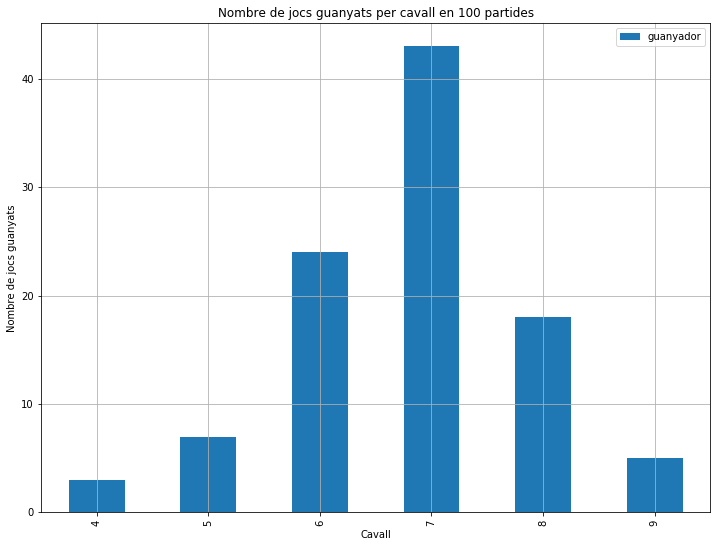

In [276]:
bar = pd.DataFrame(resultats_partides['guanyador'].value_counts())
bar.sort_index(inplace=True)

ax = bar.plot(
    kind='bar',
    figsize=(12,9),
    grid=True,
    title=f'Nombre de jocs guanyats per cavall en {n_partides} partides'
)
ax.set_xlabel('Cavall')
ax.set_ylabel('Nombre de jocs guanyats')

In [ ]:
Número 2: 0 partides guanyades en 100000 partides jugades: 0.00%
Número 3: 111 partides guanyades en 100000 partides jugades: 0.11%
Número 4: 1572 partides guanyades en 100000 partides jugades: 1.57%
Número 5: 7283 partides guanyades en 100000 partides jugades: 7.28%
Número 6: 20352 partides guanyades en 100000 partides jugades: 20.35%
Número 7: 41534 partides guanyades en 100000 partides jugades: 41.53%
Número 8: 20135 partides guanyades en 100000 partides jugades: 20.14%
Número 9: 7244 partides guanyades en 100000 partides jugades: 7.24%
Número 10: 1639 partides guanyades en 100000 partides jugades: 1.64%
Número 11: 130 partides guanyades en 100000 partides jugades: 0.13%
Número 12: 0 partides guanyades en 100000 partides jugades: 0.00%